# Subsetting MMETSP samples by transcriptome evaluation metrics

Separate issues? Absolute metrics and relative metrics compared to the original NCGR assemblies. Must perform "Poorly" or "Well" from each point of view.

In [11]:
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
from scipy import stats
import numpy as np 
import seaborn as sns
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
special_flowers = ['MMETSP0693', 'MMETSP1019', 'MMETSP0923', 'MMETSP0008', 'MMETSP1002', 'MMETSP1325', 'MMETSP1018', 
                   'MMETSP1346', 'MMETSP0088', 'MMETSP0092', 'MMETSP0717', 'MMETSP0223', 'MMETSP0115', 'MMETSP0196', 
                   'MMETSP0197', 'MMETSP0398', 'MMETSP0399', 'MMETSP0922']

In [13]:
giant_matrix = "../assembly_evaluation_data/MMETSP_all_evaluation_matrix_2.csv"
all_metrics = pd.read_csv(giant_matrix)
#all_metrics.columns.values
# transrate score metrics
all_metrics = all_metrics[~all_metrics['SampleName'].isin(special_flowers)]

In [14]:
n_seqs_max = all_metrics['n_seqs'].describe()[['max']][0]
score_max = all_metrics['score'].describe()[['max']][0]
orf_max = all_metrics['mean_orf_percent.y'].describe()[['max']][0]
largest_contig_max = all_metrics['largest.x'].describe()[['max']][0]
BUSCO_max = all_metrics['DIB.Complete_BUSCO_perc_euk_v3'].describe()[['max']][0]
unique_kmers_max = all_metrics['dib_assembly_unique_kmers'].describe()[['max']][0]

# Subsetting High Performing ID

Metrics used:
* 'n_seqs'
* 'largest.x'
* 'DIB.Complete_BUSCO_perc_euk_v3'
* 'dib_assembly_unique_kmers'

Final list, > 75 percentile in all four metrics
ranked among 660 transcriptomes (excluding duplicates)

In [15]:
high_all_table = all_metrics
high_all_table = high_all_table[['SampleName','Phylum','n_seqs','score','mean_orf_percent','largest.x','DIB.Complete_BUSCO_perc_euk_v3','dib_assembly_unique_kmers']]
print(high_all_table.shape)

(660, 8)


In [16]:
high_all_table.head()

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers
0,MMETSP0004,Ochrophyta,33559.0,0.38093,81.26381,17276.0,69.636964,19837761
1,MMETSP0005,Ochrophyta,32824.0,0.38214,80.15649,11058.0,67.326733,20350054
2,MMETSP0006,Haptophyta,47463.0,0.38143,80.79508,15370.0,55.775578,25286098
3,MMETSP0007,Haptophyta,30922.0,0.27164,71.01950,6567.0,30.363036,12496793
6,MMETSP0009,Bacillariophyta,54275.0,0.25534,80.37076,10587.0,46.534653,30074483


In [17]:
high_all_table.shape

(660, 8)

In [18]:
#high_all_table_filtered = high_all_table_filtered.set_index('SampleName')

In [19]:
high_all_table.columns

Index(['SampleName', 'Phylum', 'n_seqs', 'score', 'mean_orf_percent',
       'largest.x', 'DIB.Complete_BUSCO_perc_euk_v3',
       'dib_assembly_unique_kmers'],
      dtype='object')

In [20]:
n_seqs_cutoff = high_all_table['n_seqs'].describe()[['75%']][0]
print(n_seqs_cutoff)
score_cutoff = high_all_table['score'].describe()[['75%']][0]
print(score_cutoff)
orf_cutoff = high_all_table['mean_orf_percent'].describe()[['75%']][0]
print(orf_cutoff)
largest_contig_cutoff = high_all_table['largest.x'].describe()[['75%']][0]
print(largest_contig_cutoff)
BUSCO_cutoff = high_all_table['DIB.Complete_BUSCO_perc_euk_v3'].describe()[['75%']][0]
print(BUSCO_cutoff)
unique_kmers_cutoff = high_all_table['dib_assembly_unique_kmers'].describe()[['75%']][0]
print(unique_kmers_cutoff)

54783.0
0.37296
88.46954
14351.0
75.57755776
33219562.0


In [21]:
high_all_table_ranked = high_all_table
high_all_table_ranked['n_seqs_ranked'] = (high_all_table_ranked['n_seqs'].rank(ascending=1)/660)*100
high_all_table_ranked['largest_ranked'] = (high_all_table_ranked['largest.x'].rank(ascending=1)/660)*100
high_all_table_ranked['score_ranked'] = (high_all_table_ranked['score'].rank(ascending=1)/660)*100
high_all_table_ranked['unique_kmers_ranked'] = (high_all_table_ranked['dib_assembly_unique_kmers'].rank(ascending=1)/660)*100
high_all_table_ranked['BUSCO_ranked'] = (high_all_table_ranked['DIB.Complete_BUSCO_perc_euk_v3'].rank(ascending=1)/660)*100
high_all_table_ranked['orf_ranked'] = (high_all_table_ranked['mean_orf_percent'].rank(ascending=1)/660)*100

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [22]:
high_all_table_ranked.head()

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers,n_seqs_ranked,largest_ranked,score_ranked,unique_kmers_ranked,BUSCO_ranked,orf_ranked
0,MMETSP0004,Ochrophyta,33559.0,0.38093,81.26381,17276.0,69.636964,19837761,43.181818,88.030303,76.666667,33.484848,57.121212,40.606061
1,MMETSP0005,Ochrophyta,32824.0,0.38214,80.15649,11058.0,67.326733,20350054,40.303030,47.575758,77.121212,35.151515,50.454545,35.000000
2,MMETSP0006,Haptophyta,47463.0,0.38143,80.79508,15370.0,55.775578,25286098,67.121212,80.303030,76.818182,53.030303,24.621212,37.878788
3,MMETSP0007,Haptophyta,30922.0,0.27164,71.01950,6567.0,30.363036,12496793,33.939394,13.181818,24.469697,12.727273,7.121212,9.242424
6,MMETSP0009,Bacillariophyta,54275.0,0.25534,80.37076,10587.0,46.534653,30074483,73.787879,45.151515,20.757576,67.272727,15.075758,35.909091


In [23]:
high_heatmap_filtered = high_all_table_ranked[(high_all_table_ranked['DIB.Complete_BUSCO_perc_euk_v3'] > BUSCO_cutoff) &
                                         (high_all_table_ranked['dib_assembly_unique_kmers'] > unique_kmers_cutoff) &
                                         (high_all_table_ranked['n_seqs'] > n_seqs_cutoff) &
                                         (high_all_table_ranked['largest.x'] > largest_contig_cutoff)]

In [24]:
high_heatmap_filtered.shape

(12, 14)

In [25]:
high_heatmap_filtered

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers,n_seqs_ranked,largest_ranked,score_ranked,unique_kmers_ranked,BUSCO_ranked,orf_ranked
10,MMETSP0014,Bacillariophyta,63046.0,0.24811,74.16254,18219.0,82.838284,42853543,77.121212,90.606061,18.181818,84.545455,92.424242,15.303030
11,MMETSP0015,Bacillariophyta,63642.0,0.23404,74.92930,14591.0,79.537954,48027372,77.727273,75.606061,14.545455,86.666667,86.893939,16.969697
21,MMETSP0034,Chlorophyta,73008.0,0.26179,79.09444,28609.0,87.458746,36962364,82.272727,97.727273,22.272727,80.151515,97.424242,29.696970
23,MMETSP0039,Euglenozoa,154322.0,0.16884,69.99210,36657.0,75.907591,90240760,96.818182,98.787879,5.909091,97.424242,76.893939,7.575758
31,MMETSP0047,Cryptophyta,68249.0,0.36979,88.09522,15663.0,80.198020,35832341,80.454545,81.515152,72.878788,78.484848,88.030303,71.969697
82,MMETSP0120,Dinophyta,134492.0,0.34076,92.92111,15571.0,79.537954,84042448,94.545455,80.757576,59.545455,95.606061,86.893939,93.181818
192,MMETSP0359,Dinophyta,178850.0,0.29286,87.96250,16823.0,80.858086,112607134,98.636364,86.515152,30.757576,99.696970,89.166667,71.515152
194,MMETSP0361,Dinophyta,184980.0,0.27152,87.42226,15786.0,82.178218,114575790,98.939394,82.424242,24.242424,99.848485,91.287879,69.090909
240,MMETSP0484,Cryptophyta,64603.0,0.43111,89.53475,16621.0,77.227723,39438755,78.181818,86.060606,90.454545,82.878788,81.212121,77.727273
426,MMETSP0986,Unknown,69530.0,0.29391,89.83816,20685.0,79.207921,36238096,80.909091,94.090909,31.515152,79.545455,86.363636,78.636364


In [26]:
high_ID = high_heatmap_filtered['SampleName'].tolist()
high_ID

['MMETSP0014',
 'MMETSP0015',
 'MMETSP0034',
 'MMETSP0039',
 'MMETSP0047',
 'MMETSP0120',
 'MMETSP0359',
 'MMETSP0361',
 'MMETSP0484',
 'MMETSP0986',
 'MMETSP0987',
 'MMETSP0989']

In [27]:
print(n_seqs_cutoff)
print(score_cutoff)
print(orf_cutoff)
print(largest_contig_cutoff)
print(BUSCO_cutoff)
print(unique_kmers_cutoff)

54783.0
0.37296
88.46954
14351.0
75.57755776
33219562.0


In [28]:
high_heatmap_filtered.shape

(12, 14)

In [29]:
high_heatmap = pd.DataFrame()

In [30]:
def str_join(df, sep, *cols):
    from functools import reduce
    return reduce(lambda x, y: x.astype(str).str.cat(y.astype(str), sep=sep), 
                  [df[col] for col in cols])

In [31]:
high_heatmap_filtered.columns

Index(['SampleName', 'Phylum', 'n_seqs', 'score', 'mean_orf_percent',
       'largest.x', 'DIB.Complete_BUSCO_perc_euk_v3',
       'dib_assembly_unique_kmers', 'n_seqs_ranked', 'largest_ranked',
       'score_ranked', 'unique_kmers_ranked', 'BUSCO_ranked', 'orf_ranked'],
      dtype='object')

In [32]:
high_heatmap = high_heatmap_filtered[['n_seqs_ranked','largest_ranked','orf_ranked','score_ranked','BUSCO_ranked','unique_kmers_ranked']]

In [33]:
high_heatmap['SampleName_Phylum'] = str_join(high_heatmap_filtered, ' - ', 'SampleName', 'Phylum')

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
high_heatmap

,n_seqs_ranked,largest_ranked,orf_ranked,score_ranked,BUSCO_ranked,unique_kmers_ranked,SampleName_Phylum
10,77.121212,90.606061,15.303030,18.181818,92.424242,84.545455,MMETSP0014 - Bacillariophyta
11,77.727273,75.606061,16.969697,14.545455,86.893939,86.666667,MMETSP0015 - Bacillariophyta
21,82.272727,97.727273,29.696970,22.272727,97.424242,80.151515,MMETSP0034 - Chlorophyta
23,96.818182,98.787879,7.575758,5.909091,76.893939,97.424242,MMETSP0039 - Euglenozoa
31,80.454545,81.515152,71.969697,72.878788,88.030303,78.484848,MMETSP0047 - Cryptophyta
82,94.545455,80.757576,93.181818,59.545455,86.893939,95.606061,MMETSP0120 - Dinophyta
192,98.636364,86.515152,71.515152,30.757576,89.166667,99.696970,MMETSP0359 - Dinophyta
194,98.939394,82.424242,69.090909,24.242424,91.287879,99.848485,MMETSP0361 - Dinophyta
240,78.181818,86.060606,77.727273,90.454545,81.212121,82.878788,MMETSP0484 - Cryptophyta
426,80.909091,94.090909,78.636364,31.515152,86.363636,79.545455,MMETSP0986 - Unknown


In [35]:
high_heatmap = high_heatmap.set_index('SampleName_Phylum')

In [36]:
high_heatmap.columns

Index(['n_seqs_ranked', 'largest_ranked', 'orf_ranked', 'score_ranked',
       'BUSCO_ranked', 'unique_kmers_ranked'],
      dtype='object')

In [37]:
high_heatmap

,n_seqs_ranked,largest_ranked,orf_ranked,score_ranked,BUSCO_ranked,unique_kmers_ranked
SampleName_Phylum,,,,,,
MMETSP0014 - Bacillariophyta,77.121212,90.606061,15.303030,18.181818,92.424242,84.545455
MMETSP0015 - Bacillariophyta,77.727273,75.606061,16.969697,14.545455,86.893939,86.666667
MMETSP0034 - Chlorophyta,82.272727,97.727273,29.696970,22.272727,97.424242,80.151515
MMETSP0039 - Euglenozoa,96.818182,98.787879,7.575758,5.909091,76.893939,97.424242
MMETSP0047 - Cryptophyta,80.454545,81.515152,71.969697,72.878788,88.030303,78.484848
MMETSP0120 - Dinophyta,94.545455,80.757576,93.181818,59.545455,86.893939,95.606061
MMETSP0359 - Dinophyta,98.636364,86.515152,71.515152,30.757576,89.166667,99.696970
MMETSP0361 - Dinophyta,98.939394,82.424242,69.090909,24.242424,91.287879,99.848485
MMETSP0484 - Cryptophyta,78.181818,86.060606,77.727273,90.454545,81.212121,82.878788


In [38]:
high_heatmap.shape

(12, 6)

# Subsetting Low

Metrics used:
* 'n_seqs'
* 'largest.x'
* 'DIB.Complete_BUSCO_perc_euk_v3'
* 'dib_assembly_unique_kmers'

Final list, < 25 percentile in all four metrics
ranked among 660 transcriptomes (excluding duplicates)

In [39]:
low_all_table = all_metrics
low_all_table = low_all_table[['SampleName','Phylum','n_seqs','score','mean_orf_percent','largest.x','DIB.Complete_BUSCO_perc_euk_v3','dib_assembly_unique_kmers']]
print(low_all_table.shape)

(660, 8)


In [40]:
n_seqs_cutoff = high_all_table['n_seqs'].describe()[['25%']][0]
print(n_seqs_cutoff)
score_cutoff = high_all_table['score'].describe()[['25%']][0]
print(score_cutoff)
orf_cutoff = high_all_table['mean_orf_percent'].describe()[['25%']][0]
print(orf_cutoff)
largest_contig_cutoff = high_all_table['largest.x'].describe()[['25%']][0]
print(largest_contig_cutoff)
BUSCO_cutoff = high_all_table['DIB.Complete_BUSCO_perc_euk_v3'].describe()[['25%']][0]
print(BUSCO_cutoff)
unique_kmers_cutoff = high_all_table['dib_assembly_unique_kmers'].describe()[['25%']][0]
print(unique_kmers_cutoff)

27381.0
0.27368
77.94447
8059.0
56.10561056
17382400.75


In [41]:
low_all_table_ranked = low_all_table
low_all_table_ranked['n_seqs_ranked'] = (low_all_table_ranked['n_seqs'].rank(ascending=1)/660)*100
low_all_table_ranked['largest_ranked'] = (low_all_table_ranked['largest.x'].rank(ascending=1)/660)*100
low_all_table_ranked['score_ranked'] = (low_all_table_ranked['score'].rank(ascending=1)/660)*100
low_all_table_ranked['unique_kmers_ranked'] = (low_all_table_ranked['dib_assembly_unique_kmers'].rank(ascending=1)/660)*100
low_all_table_ranked['BUSCO_ranked'] = (low_all_table_ranked['DIB.Complete_BUSCO_perc_euk_v3'].rank(ascending=1)/660)*100
low_all_table_ranked['orf_ranked'] = (low_all_table_ranked['mean_orf_percent'].rank(ascending=1)/660)*100

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [42]:
BUSCO_cutoff

56.105610560000002

In [43]:
low_all_table_ranked.head()

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers,n_seqs_ranked,largest_ranked,score_ranked,unique_kmers_ranked,BUSCO_ranked,orf_ranked
0,MMETSP0004,Ochrophyta,33559.0,0.38093,81.26381,17276.0,69.636964,19837761,43.181818,88.030303,76.666667,33.484848,57.121212,40.606061
1,MMETSP0005,Ochrophyta,32824.0,0.38214,80.15649,11058.0,67.326733,20350054,40.303030,47.575758,77.121212,35.151515,50.454545,35.000000
2,MMETSP0006,Haptophyta,47463.0,0.38143,80.79508,15370.0,55.775578,25286098,67.121212,80.303030,76.818182,53.030303,24.621212,37.878788
3,MMETSP0007,Haptophyta,30922.0,0.27164,71.01950,6567.0,30.363036,12496793,33.939394,13.181818,24.469697,12.727273,7.121212,9.242424
6,MMETSP0009,Bacillariophyta,54275.0,0.25534,80.37076,10587.0,46.534653,30074483,73.787879,45.151515,20.757576,67.272727,15.075758,35.909091


In [44]:
low_all_table_ranked.shape

(660, 14)

In [45]:
low_heatmap_filtered = low_all_table_ranked[(low_all_table_ranked['DIB.Complete_BUSCO_perc_euk_v3'] < BUSCO_cutoff) &
                                            (low_all_table_ranked['dib_assembly_unique_kmers'] < unique_kmers_cutoff) &
                                            (low_all_table_ranked['n_seqs'] < n_seqs_cutoff) &
                                            (low_all_table_ranked['largest.x'] < largest_contig_cutoff) &
                                            (low_all_table['score'] < score_cutoff)]

In [46]:
low_heatmap_filtered.shape

(30, 14)

In [47]:
low_heatmap_filtered = low_heatmap_filtered[(low_heatmap_filtered['unique_kmers_ranked'] < 10) & 
                                            (low_heatmap_filtered['n_seqs_ranked'] < 10) & 
                                            (low_heatmap_filtered['BUSCO_ranked'] < 10)]

In [48]:
low_heatmap_filtered.shape

(15, 14)

In [49]:
low_heatmap_filtered

,SampleName,Phylum,n_seqs,score,mean_orf_percent,largest.x,DIB.Complete_BUSCO_perc_euk_v3,dib_assembly_unique_kmers,n_seqs_ranked,largest_ranked,score_ranked,unique_kmers_ranked,BUSCO_ranked,orf_ranked
28,MMETSP0044,Dinophyta,594.0,0.00465,92.68547,697.0,0.990099,135164,0.909091,0.606061,1.969697,1.060606,1.212121,92.575758
89,MMETSP0133,Dinophyta,15572.0,0.00205,86.28031,2571.0,10.891089,3938227,8.484848,2.272727,1.818182,2.878788,2.878788,66.060606
118,MMETSP0186,Cercozoa,1669.0,0.02341,92.62782,1956.0,1.650165,554862,1.363636,1.666667,2.272727,1.666667,1.515152,92.121212
145,MMETSP0225,Dinophyta,849.0,0.00144,84.00110,1118.0,0.330033,151884,1.060606,0.757576,1.666667,1.212121,0.909091,56.212121
148,MMETSP0229,Dinophyta,321.0,0.00071,85.08741,495.0,0.000000,75019,0.757576,0.303030,0.606061,0.757576,0.454545,61.515152
154,MMETSP0252,Dinophyta,4.0,0.00002,48.22044,682.0,0.000000,838,0.151515,0.454545,0.303030,0.151515,0.454545,2.121212
231,MMETSP0451,Dinophyta,4441.0,0.02350,85.64647,1774.0,11.221122,1651813,1.666667,0.909091,2.424242,2.121212,3.106061,64.242424
232,MMETSP0452,Dinophyta,19.0,0.00000,91.90509,286.0,0.000000,4560,0.303030,0.151515,0.151515,0.303030,0.454545,88.484848
279,MMETSP0719,Bacillariophyta,7884.0,0.18649,79.20223,5948.0,6.600660,2990388,1.969697,8.030303,6.969697,2.575758,2.575758,30.151515
386,MMETSP0932,Chlorophyta,4990.0,0.03437,92.64433,4451.0,3.630363,1764127,1.818182,4.393939,2.727273,2.272727,1.969697,92.272727


In [50]:
low_ID = low_heatmap_filtered['SampleName'].tolist()
low_ID

['MMETSP0044',
 'MMETSP0133',
 'MMETSP0186',
 'MMETSP0225',
 'MMETSP0229',
 'MMETSP0252',
 'MMETSP0451',
 'MMETSP0452',
 'MMETSP0719',
 'MMETSP0932',
 'MMETSP0962',
 'MMETSP1131',
 'MMETSP1147',
 'MMETSP1148',
 'MMETSP1435']

In [51]:
low_heatmap = low_heatmap_filtered[['n_seqs_ranked','largest_ranked','orf_ranked','score_ranked','BUSCO_ranked','unique_kmers_ranked']]

In [52]:
low_heatmap['SampleName_Phylum'] = str_join(low_heatmap_filtered, ' - ', 'SampleName', 'Phylum')

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
low_heatmap = low_heatmap.set_index("SampleName_Phylum")

In [54]:
low_heatmap

,n_seqs_ranked,largest_ranked,orf_ranked,score_ranked,BUSCO_ranked,unique_kmers_ranked
SampleName_Phylum,,,,,,
MMETSP0044 - Dinophyta,0.909091,0.606061,92.575758,1.969697,1.212121,1.060606
MMETSP0133 - Dinophyta,8.484848,2.272727,66.060606,1.818182,2.878788,2.878788
MMETSP0186 - Cercozoa,1.363636,1.666667,92.121212,2.272727,1.515152,1.666667
MMETSP0225 - Dinophyta,1.060606,0.757576,56.212121,1.666667,0.909091,1.212121
MMETSP0229 - Dinophyta,0.757576,0.303030,61.515152,0.606061,0.454545,0.757576
MMETSP0252 - Dinophyta,0.151515,0.454545,2.121212,0.303030,0.454545,0.151515
MMETSP0451 - Dinophyta,1.666667,0.909091,64.242424,2.424242,3.106061,2.121212
MMETSP0452 - Dinophyta,0.303030,0.151515,88.484848,0.151515,0.454545,0.303030
MMETSP0719 - Bacillariophyta,1.969697,8.030303,30.151515,6.969697,2.575758,2.575758


# Heatmap Good

In [55]:
high_heatmap.shape

(12, 6)

In [56]:
high_heatmap.columns = ["Number of Contigs","Largest Contig","% ORF","Transrate Score","% Complete BUSCO","Unique k-mers"]

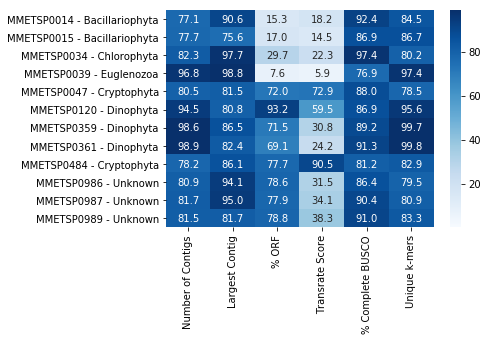

In [57]:
ax = sns.heatmap(high_heatmap, annot=True,cmap="Blues",fmt='.1f', vmin=0.1, vmax=99);
ax.set_ylabel("")
fig = ax.get_figure()  
fig.savefig('../paper/heatmap_high.pdf',bbox_inches="tight",dpi=1000)
fig.savefig('../paper/heatmap_high.png',bbox_inches="tight",dpi=1000)

# Heatmap Poor

In [58]:
low_heatmap.columns = ["Number of Contigs","Largest Contig","% ORF","Transrate Score","% Complete BUSCO","Unique k-mers"]

In [59]:
low_heatmap.shape

(15, 6)

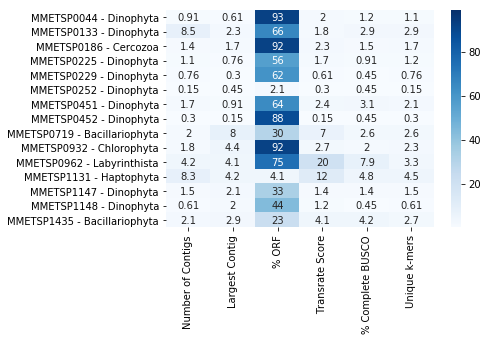

In [60]:
ax = sns.heatmap(low_heatmap, annot=True,cmap="Blues", vmin=0.1, vmax=99);
ax.set_ylabel("")
fig = ax.get_figure()  
fig.savefig('../paper/heatmap_low.pdf',bbox_inches="tight",dpi=1000)
fig.savefig('../paper/heatmap_low.png',bbox_inches="tight",dpi=1000)

# Version Info

In [64]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'd86648c5d',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Users/johnsolk/anaconda3/lib/python3.6/site-packages/IPython',
 'ipython_version': '6.1.0',
 'os_name': 'posix',
 'platform': 'Darwin-17.4.0-x86_64-i386-64bit',
 'sys_executable': '/Users/johnsolk/anaconda3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, '
                '12:04:38) \n'
                '[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'}


In [66]:
%load_ext version_information
%version_information pandas, numpy, seaborn, pylab, matplotlib, scipy

Software versions
Python 3.6.3 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.1.0
OS Darwin 17.4.0 x86_64 i386 64bit
pandas 0.22.0
numpy 1.13.3
seaborn 0.8.0
pylab The 'pylab' distribution was not found and is required by the application
matplotlib 2.1.2
scipy 0.19.1
Fri Sep 14 13:33:07 2018 PDT